In [43]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt

(288,) (288,)


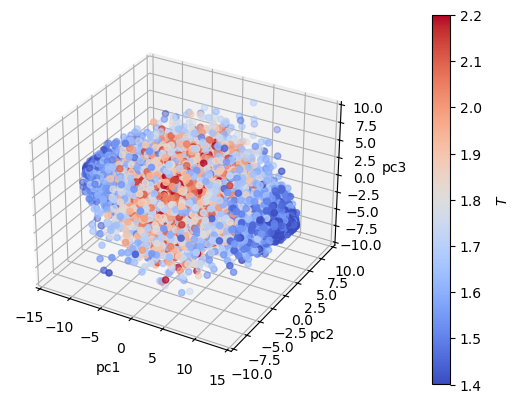

In [44]:
# Part (a) 
#data frames for ising model configuration
df1 = pd.read_csv("/Users/charleswong/Desktop/PHYS3151_asm4_version_control/Ising_config_L12.csv", header=None)
df1 = df1.to_numpy()
x = df1
# print(x)
# print("x.shape", x.shape)


#data frames for temperature data
df2 = pd.read_csv("/Users/charleswong/Desktop/PHYS3151_asm4_version_control/T_data_L12.csv", header=None)
df2 = df2.to_numpy()
t = df2
# print(t)
# print("t.shape:", t.shape)

#Calculate the the matrix Z 
z = np.zeros((8500, 288))
x_mean = np.mean(x,axis=0)
x_var = np.var(x,axis=0)
x_std = np.std(x,axis=0,ddof=0)
print(x_mean.shape,x_std.shape)
for i in range(288):
  z[:,i] = (x[:,i] - x_mean[i]) / x_std[i]

# print("z", z)
# print("z.shape", z.shape)

#Covariance Matrix 
cov = np.cov(z,rowvar=False)
# print("cov.shap:", cov.shape)
# print("cov:", cov)

#single value decomposition
from numpy import linalg as la
U,sigma,VT=la.svd(cov)
# sigma is eigenvalue, U is eigenvector
# print("sigma:", sigma)
# print("U.shape:", U.shape)
#print(U)

def reduce_system(U,dimension):
    U_reduced=U[ : , :dimension]
    reduced_vec=np.dot(z,U_reduced)
    var=np.sum(sigma[:dimension])/np.sum(sigma[:])
    return reduced_vec,var

reducevec, vari = reduce_system(U,3)
# print(reducevec)
from mpl_toolkits.mplot3d import Axes3D  # Import 3D plotting toolkit

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(reducevec[:,0], reducevec[:,1], reducevec[:,2], c=t, cmap="coolwarm")
ax.set_xlabel('pc1')
ax.set_ylabel('pc2')
ax.set_zlabel('pc3')
ax.set_xlim(-15, 15)
ax.set_ylim(-10, 10)
ax.set_zlim(-10, 10)
# cb = fig.colorbar(scatter)
cb = fig.colorbar(scatter, pad=0.15)
cb.set_label(label='$T$',labelpad=10)
plt.show()


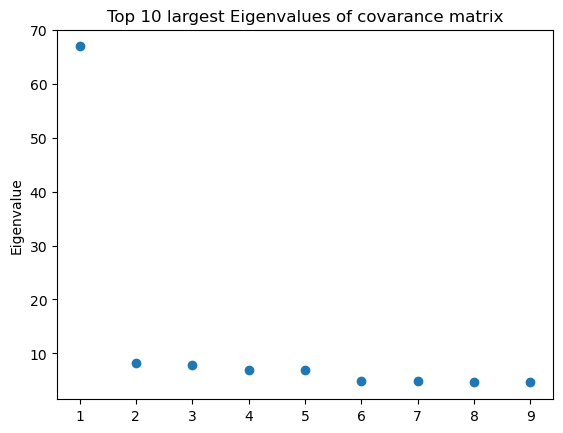

In [45]:
#part(b)

#print the eigenvalue
n = []
for i in range(1,10):
  n.append(i)
plt.scatter(n[0:9],sigma[0:9])
plt.ylabel("Eigenvalue")
plt.title("Top 10 largest Eigenvalues of covarance matrix")
plt.show()

a: [7106, 2334, 263]
13.814763569420519
8.66040178031177
3.2302102767363743
0.615092703281741
0.10718266762964938
0.011104620272897556
0.0021687859733103172
0.0004775372902151239
0.0002104163986535633
force exit with diff = 9.501947657282467e-05


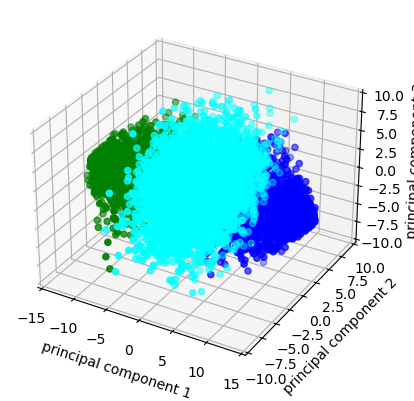

In [ ]:
# part (c)

import random
K = 3
a = random.sample(range(0, len(reducevec)-1), K)
Centroids = np.zeros((K, 3))
print("a:", a)
for i in range(K):
    Centroids[i, 0] = reducevec[a[i], 0]
    Centroids[i, 1] = reducevec[a[i], 1]
    Centroids[i, 2] = reducevec[a[i], 2]
# Plot raw data and initial centroids in 3D using Axes3D
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(reducevec[:, 0], reducevec[:, 1], reducevec[:, 2], c=t, cmap="coolwarm", label="Data")
# ax.scatter(Centroids[:, 0], Centroids[:, 1], Centroids[:, 2], c='black', marker='^', s=100, label="Centroids")
# ax.set_xlabel('principal component 1')
# ax.set_ylabel('principal component 2')
# ax.set_zlabel('principal component 3')
# ax.legend()
# plt.show()

pc = reducevec.tolist()
Centroids = Centroids.tolist()
principalComponents = pd.DataFrame(pc)
Centroids = pd.DataFrame(Centroids)
# print(principalComponents)
# print(Centroids)

def K_mean(pc, K=3, jmax=10):
    # Step 1 & 2: Choose K clusters at random and select random points as centroids
    a = random.sample(range(0, len(pc) - 1), K)
    # Change from 2 to 3 columns:
    Centroids = np.zeros((K, 3))
    for i in range(K):
        Centroids[i, 0] = pc[a[i]][0]
        Centroids[i, 1] = pc[a[i]][1]
        Centroids[i, 2] = pc[a[i]][2]
    diff = 1
    j = 0
    # Create DataFrames with 3 columns
    Centroids = pd.DataFrame(Centroids, columns=['pc1', 'pc2', 'pc3'])
    principalComponents = pd.DataFrame(pc, columns=['pc1', 'pc2', 'pc3'])
    
    while diff != 0:
        XD = principalComponents.copy()
        i = 1
        # Step 3: Assign points to the closest centroid using 3-D Euclidean distance
        for index1, row_c in Centroids.iterrows():
            ED = []
            for index2, row_d in XD.iterrows():
                d1 = (row_c["pc1"] - row_d["pc1"]) ** 2
                d2 = (row_c["pc2"] - row_d["pc2"]) ** 2
                d3 = (row_c["pc3"] - row_d["pc3"]) ** 2
                d = np.sqrt(d1 + d2 + d3)
                ED.append(d)
            principalComponents[str(i)] = ED
            i = i + 1

        C = []
        for index, row in principalComponents.iterrows():
            min_dist = row['1']
            pos = 1
            for i in range(K):
                # using string keys "1", "2", ... for the distance columns
                if row[str(i+1)] < min_dist:
                    min_dist = row[str(i+1)]
                    pos = i + 1
            C.append(pos)
        principalComponents["Cluster"] = C
        
        # Step 4: Recompute centroids using all 3 components
        Centroids_new = principalComponents.groupby("Cluster").mean()[["pc1", "pc2", "pc3"]]
        
        # Step 5: Compute the difference using all three components
        if j == 0:
            diff = 1
            j = j + 1
        elif j < jmax:
            diff = (((Centroids_new - Centroids) ** 2).sum()).sum()
            print(diff)
            j = j + 1
        else:
            diff = (((Centroids_new - Centroids) ** 2).sum()).sum()
            print("force exit with diff =", diff)
            diff = 0
        Centroids = principalComponents.groupby("Cluster").mean()[["pc1", "pc2", "pc3"]]
    return principalComponents, Centroids

principalComponents, Centroids=K_mean(pc,3)

from mpl_toolkits.mplot3d import Axes3D  # Import for 3D plotting

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

color = ['blue', 'green', 'cyan']
for k in range(K):
    data = principalComponents[principalComponents["Cluster"] == k + 1]
    ax.scatter(data["pc1"], data["pc2"], data["pc3"], c=color[k], label=f'Cluster {k+1}')
    
ax.scatter(Centroids["pc1"], Centroids["pc2"], Centroids["pc3"], c='red', marker='x', s=100, label="Centroids")
ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')
ax.set_zlabel('principal component 3')
ax.set_xlim(-15, 15)
ax.set_ylim(-10, 10)
ax.set_zlim(-10, 10)
plt.show()

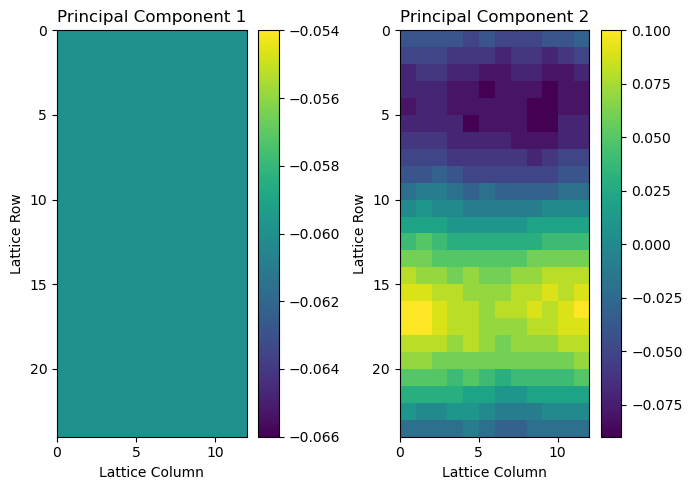

In [ ]:
# Part (d): Plot the distribution of eigenvectors as heatmaps on a 24×12 lattice (y axis 24, x axis 12)

# Reshape the eigenvectors into 24 rows (y-axis) and 12 columns (x-axis) and round to 2 decimal places
eigenvec1 = np.around(U[:, 0].reshape(24, 12), 2)
eigenvec2 = np.around(U[:, 1].reshape(24, 12), 2)

# Define extent so that x-axis runs from 0 to 12 and y-axis runs from 0 to 24
extent = (0, 12, 24, 0)

fig, axs = plt.subplots(1, 2, figsize=(7, 5))

# Plot heatmap of the first eigenvector
heat1 = axs[0].imshow(eigenvec1, cmap="viridis", extent=extent, aspect="auto")
axs[0].set_title("Principal Component 1")
axs[0].set_xlabel("Lattice Column")
axs[0].set_ylabel("Lattice Row")
fig.colorbar(heat1, ax=axs[0])

# Plot heatmap of the second eigenvector
heat2 = axs[1].imshow(eigenvec2, cmap="viridis", extent=extent, aspect="auto")
axs[1].set_title("Principal Component 2")
axs[1].set_xlabel("Lattice Column")
axs[1].set_ylabel("Lattice Row")
fig.colorbar(heat2, ax=axs[1])

plt.tight_layout()
plt.show()

#Physical Interpretation:
#By visualizing these eigenvectors on a 12×24 lattice, 
# you can infer how the structure of correlations is distributed across the lattice. 
# For instance, areas with similar color values in the first eigenvector heatmap might correspond to 
# regions with strong collective behavior (such as magnetically ordered domains), 
# while the second eigenvector may reveal subtle variations or boundaries between different magnetic domains.